### Introduction

- In this notebook we investigated the US Used Cars dataset, which includes information on 65 aspects of nearly 3,000 used cars. The purpose of this project was to determine which of these features had some bearing on car price and followingly to be able to use them to predict the price of each car accurately such that, with information on any given car, we could predict its price. We train a variety of supervised machine learning models to determine which one makes the most accuract predictions.

### Import Libraries and Data

In [200]:
# Import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [201]:
# To hide warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [202]:
# Locate and read in dataset
os.chdir('C:/Users/alexa/Downloads')
cars = pd.read_csv("/Users/alexa/Downloads/used_cars_data_small_0.csv")

### Exploratory Data Analysis

In [203]:
# Examine attributes in the raw dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      2760 non-null   object 
 1   back_legroom             2689 non-null   object 
 2   bed                      7 non-null      object 
 3   bed_height               132 non-null    object 
 4   bed_length               132 non-null    object 
 5   body_type                2755 non-null   object 
 6   cabin                    12 non-null     object 
 7   city                     2760 non-null   object 
 8   city_fuel_economy        2180 non-null   float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             2760 non-null   int64  
 11  dealer_zip               2760 non-null   int64  
 12  description              2715 non-null   object 
 13  engine_cylinders         2709 non-null   object 
 14  engine_displacement     

In [204]:
# View profile of each attribute
cars.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2180.000000,0.0,2760.000000,2760.000000,2684.000000,2180.000000,2684.000000,0.0,2760.000000,2.760000e+03,2760.000000,2515.000000,1867.000000,2760.000000,2760.000000,2757.000000,2760.000000,0.0,2760.000000
mean,21.107339,NaN,73.248188,9133.382971,2856.482861,28.220183,242.745156,NaN,40.125809,2.755529e+08,-73.319918,46836.804771,1.551687,25274.992754,1049.517754,3.755076,268255.255435,NaN,2016.511957
std,5.905360,NaN,109.190642,4975.220174,1145.796772,5.950010,84.860623,NaN,4.316845,8.977100e+06,1.811790,49224.398706,0.849867,15307.351213,1437.884275,0.515063,122981.005322,NaN,4.340676
min,10.000000,NaN,0.000000,922.000000,1200.000000,14.000000,78.000000,NaN,18.346700,1.718651e+08,-83.924400,0.000000,1.000000,1499.000000,0.000000,1.000000,56374.000000,NaN,1978.000000
25%,18.000000,NaN,14.000000,7036.000000,2000.000000,24.000000,176.000000,NaN,40.733300,2.753293e+08,-74.049300,2635.000000,1.000000,14797.750000,0.000000,3.447761,282468.000000,NaN,2015.000000
50%,20.000000,NaN,35.000000,8701.000000,2500.000000,27.000000,240.000000,NaN,40.777400,2.784647e+08,-73.464300,34893.000000,1.000000,23825.000000,518.500000,3.647059,314501.000000,NaN,2017.000000
75%,24.000000,NaN,71.250000,11706.000000,3500.000000,31.000000,295.000000,NaN,40.884700,2.803164e+08,-73.105500,67541.500000,2.000000,31995.000000,1578.500000,4.343284,339626.000000,NaN,2020.000000
max,127.000000,NaN,1252.000000,48843.000000,6700.000000,122.000000,797.000000,NaN,42.785100,2.816540e+08,-66.078500,340003.000000,6.000000,135465.000000,12801.000000,5.000000,432605.000000,NaN,2021.000000


In [205]:
# Remove columns with no entries (count=0)
cars.drop(["combine_fuel_economy", "is_certified", "vehicle_damage_category"], axis=1, inplace=True)

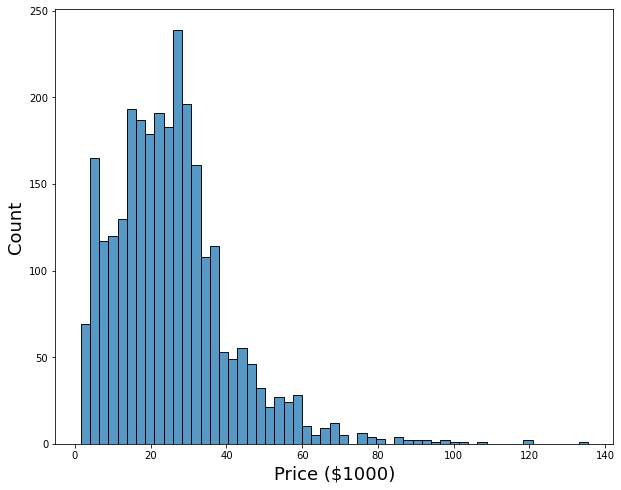

In [206]:
# Visualise distribution of car prices
cars.price2 = (cars.price)/1000
plt.figure(figsize=(10,8))
sns.histplot(data=cars, x=cars.price2)
plt.xlabel("Price ($1000)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.show()

- The prices are positively skewed. Most car prices lie below $40,000, but high prices skew the distribution.

Text(0, 0.5, 'Latitude')

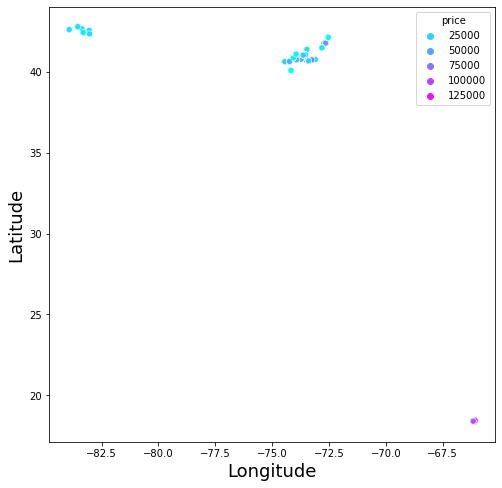

In [207]:
# Visualise geopgraphical distribution of used car dealerships
plt.figure(figsize=(8, 8))
sns.scatterplot(data=cars, x="longitude", y="latitude", hue="price", palette="cool")
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=18)

- Longitude and latitude do not show significant patterns in price distribution. All the dealership locations appear to be highly clustered which may be a result of the small dataset size.

Text(0, 0.5, 'Price ($1000)')

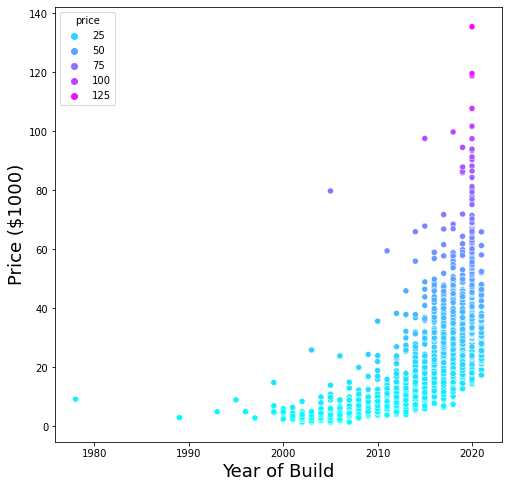

In [208]:
# Visualise price against year (of car-build) attribute
plt.figure(figsize=(8, 8))
sns.scatterplot(x=cars.year, y=cars.price2, palette="cool", hue=cars.price2)
plt.xlabel("Year of Build", fontsize=18)
plt.ylabel("Price ($1000)", fontsize=18)

- The average price of a used car seems to increase the more recently it was built; year is therefore correlated with price.

Text(0, 0.5, 'Car Body Type')

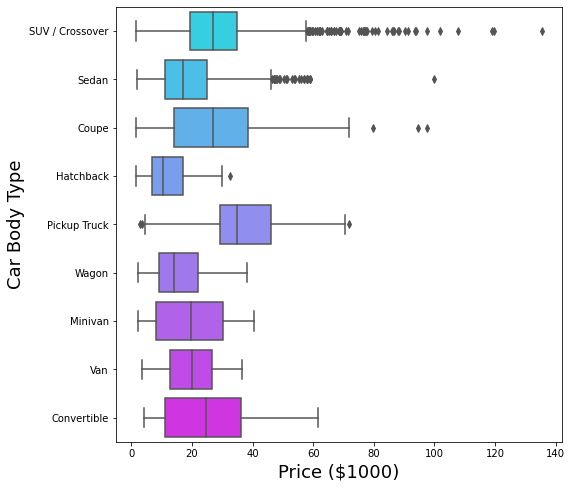

In [209]:
# Visualise price against body type attribute
plt.figure(figsize=(8, 8))
sns.boxplot(x=cars.price2, y=cars.body_type, palette="cool")
plt.xlabel("Price ($1000)", fontsize=18)
plt.ylabel("Car Body Type", fontsize=18)

- Body_type appears to be correlated with price based on the fact that many of the body types' interquartile price ranges do not overlap.

Text(0, 0.5, 'Car Engine Type')

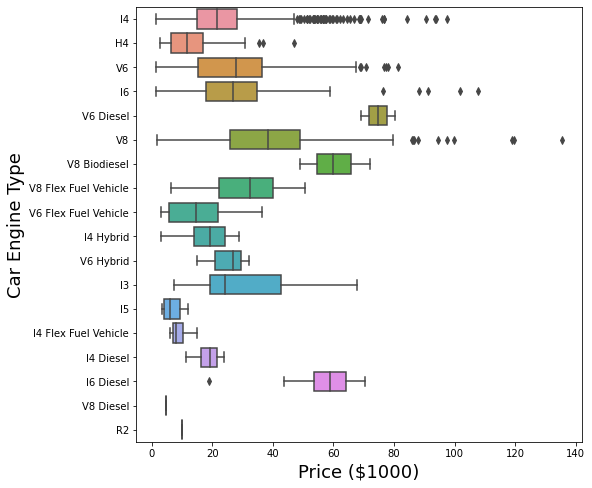

In [210]:
# Visualise price against engine type attribute
plt.figure(figsize=(8, 8))
sns.boxplot(x=cars.price2, y=cars.engine_type)
plt.xlabel("Price ($1000)", fontsize=18)
plt.ylabel("Car Engine Type", fontsize=18)

- Engine_type appears to be strongly correlated with price.

Text(0, 0.5, 'Car Brand')

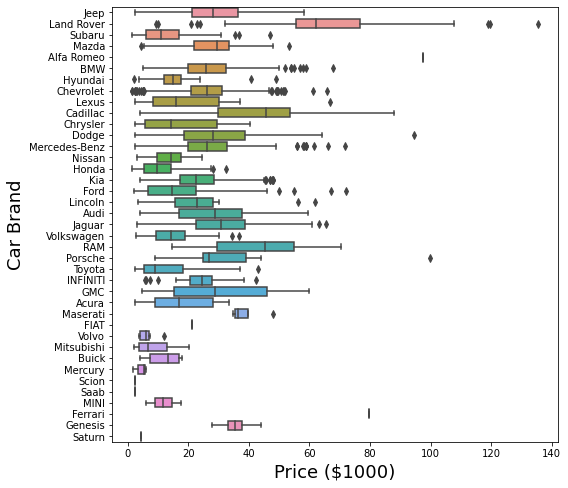

In [211]:
# Visualise price against car make attribute
plt.figure(figsize=(8, 8))
sns.boxplot(x=cars.price2, y=cars.make_name)
plt.xlabel("Price ($1000)", fontsize=18)
plt.ylabel("Car Brand", fontsize=18)

- Make_name appears to be strongly correlated with price based on the fact that many of the brands' interquartile price ranges do not overlap; Land Rover cars are markedly the most expensive.

### Feature Engineering

In [212]:
# Explore all feature variables
pd.options.display.max_columns = None
display(cars)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.800000,370599,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.000000,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.000000,389227,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.000000,389227,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,3FA6P0HD4LR166836,38.3 in,NaN,NaN,NaN,Sedan,NaN,Holly,23.0,197,48442,"Factory MSRP: $25,890 $7,529 of

In [213]:
# Remove "in" from 'wheelbase', 'width', 'length', 'front_legroom', back_legroom', and 'height' columns
cars['wheelbase'] = cars['wheelbase'].str.replace(' in', '')
cars['width'] = cars['width'].str.replace(' in', '')
cars['back_legroom'] = cars['back_legroom'].str.replace(' in', '')
cars['front_legroom'] = cars['front_legroom'].str.replace(' in', '')
cars['height'] = cars['height'].str.replace(' in', '')
cars['length'] = cars['length'].str.replace(' in', '')
cars['bed_height'] = cars['bed_height'].str.replace(' in', '')
cars['bed_length'] = cars['bed_length'].str.replace(' in', '')

In [214]:
# Remove "gal" from 'fuel_tank_volume' column
cars['fuel_tank_volume'] = cars['fuel_tank_volume'].str.replace('gal', '')

# Remove 'wheel_system_display' attribute since it provides the same information as 'wheel_system'
cars.drop(['wheel_system_display'], axis=1, inplace=True)

# Remove 'trim_name' attribute since it provides the same information as 'trimId'
cars.drop(['trim_name'], axis=1, inplace=True)

# Remove 'transmission_display' attribute since the information it provides is given by 'wheel_system'
cars.drop(['transmission'], axis=1, inplace=True)

# Remove 'sp_name' since the information it provides is mostly given by the combination of 'dealer_zip and 'make_name'
cars.drop(['sp_name'], axis=1, inplace=True)

# Remove 'description' and 'major_options' since the information they provide cannot feasibly be made use of as features
cars.drop(['description', 'major_options'], axis=1, inplace=True)

# Remove 'sp_id' atirubute since this provides the same information as 'sp_name'
cars.drop(['sp_id'], axis=1, inplace=True)

# Remove "seats" from 'maximum_seating' and shorten name
cars['maximum_seating'] = cars['maximum_seating'].str.replace('\D', '', regex=True)
cars.rename(columns={'maximum_seating': 'max_seating'}, inplace=True)

# Remove 'city' since the information it provides is given by 'dealer_zip'
cars.drop(["city"], axis=1, inplace=True)

# Remove 'horsepower' attribute since this provides the same information as 'power_hp'
cars.drop(['horsepower'], axis=1, inplace=True)

# Remove 'engine_cylinders' since this provides the same information as 'engine_type'
cars.drop(['engine_cylinders'], axis=1, inplace=True)

# Remove 'exterior_color' since the information it provides is given in enough detail by 'listing_colour'
cars.drop(['exterior_color'], axis=1, inplace=True)

In [215]:
# Separate 'torque' and 'power' into two columns each 
cars['torque_poundage'] = cars['torque'].astype(str).str[0:3]
cars['torque_RPM'] = cars['torque'].astype(str).str[12:16]
cars['torque_RPM'] = cars['torque_RPM'].replace(',','', regex=True)
cars.drop(['torque'], axis=1, inplace=True)

cars['power_hp'] = cars['power'].astype(str).str[0:3]
cars['power_hp'] = cars['power_hp'].replace(',','', regex=True)
cars['power_RPM'] = cars['power'].astype(str).str[10:13]
cars['power_RPM'] = cars['power_RPM'].replace(',','', regex=True)
cars.drop(['power'], axis=1, inplace=True)

In [216]:
# Remove attributes with greater than 10% null values
cars_reduced = cars.loc[:, cars.isnull().mean() < .1]

In [217]:
# Create separate dataframe with only numeric attributes
cars_numeric = cars_reduced[["power_RPM", "power_hp", "torque_RPM", 
                                               "torque_poundage", "width", 
                                               "wheelbase", "seller_rating", 
                                               "savings_amount", "mileage", "max_seating", 
                                               "length", "longitude", "latitude", "height", 
                                               "fuel_tank_volume", "front_legroom", 
                                               "engine_displacement", "back_legroom", 
                                               "daysonmarket", "price"]].apply(pd.to_numeric, errors='coerce')

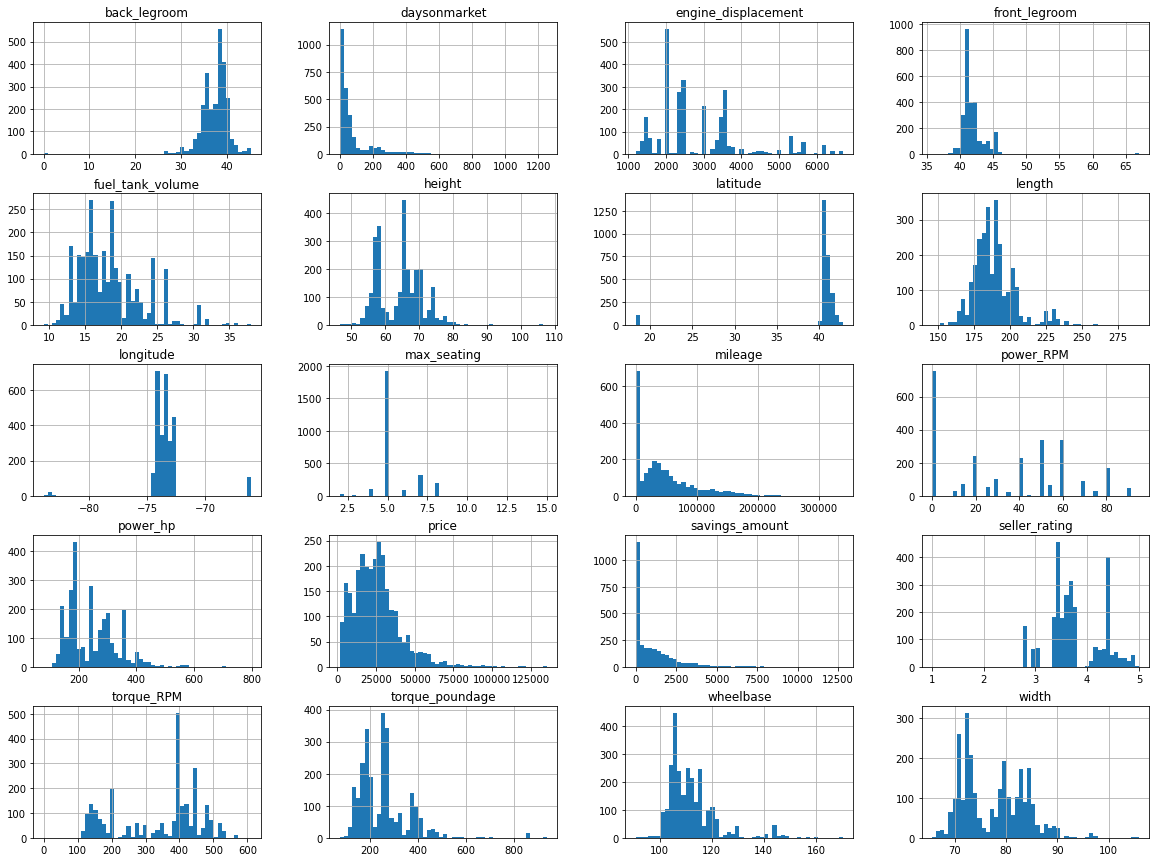

In [218]:
# Visualise all numerical attributes' distributions
%matplotlib inline 
import matplotlib.pyplot as plt
cars_numeric.hist(bins=50, figsize=(20,15))
plt.show()

- Many of the attributes have skewed distributions, suggesting the median as the best form of average to use for imputation of null values in the following preparation of the data.

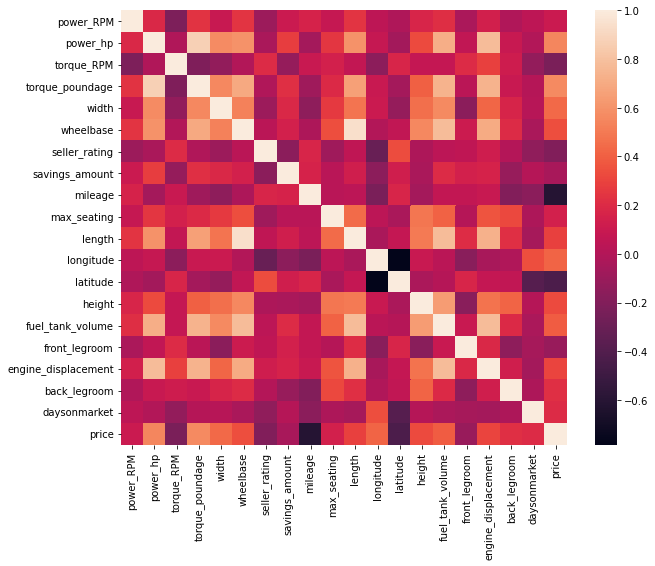

In [219]:
# Plot correlation between numerical attributes
corr_mat = cars_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat)

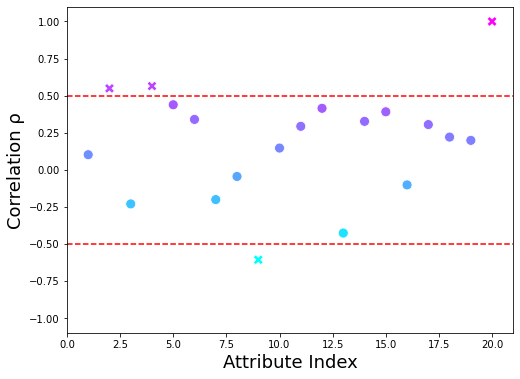

In [220]:
# Plot price correlations
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.linspace(1,len(corr_mat.price),len(corr_mat.price)), y=corr_mat.price, hue=corr_mat.price, palette="cool", legend=None, s=100, style=abs(corr_mat.price)>0.5)
plt.axis([0,21,-1.1,1.1])
plt.xlabel("Attribute Index", fontsize=18)
plt.ylabel("Correlation \u03C1", fontsize=18)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=-0.5, color='r', linestyle='--')
plt.show()

- Three of the twenty numerical attributes (other than price itself) have strong correlation with the price attribute of magnitude greater than 0.5: 'mileage', 'torque_poundage', and 'power_hp'. The other variables shall be discarded from inclusion in the training models.

In [221]:
# Find the numerical attributes correlated with price 
corr_mat.price[(abs(corr_mat.price)>0.5)].sort_values(ascending=False)

price              1.000000
torque_poundage    0.564291
power_hp           0.548476
mileage           -0.607234
Name: price, dtype: float64

In [222]:
# Further reduced dataset after dropping uncorrelated numerical attributes
cars_further_reduced = cars_reduced.iloc[:,[0,2,4,6,7,10,12,13,16,17,18,20,22,24,27,28,29,32,34,35]]
# Create dataset for kept numerical attributes
cars_numerical = cars_numeric[['power_hp', 'torque_poundage', 'mileage', 'price']]
cars_numerical

,power_hp,torque_poundage,mileage,price
0,177.0,200.0,7.0,23141.0
1,246.0,269.0,8.0,46500.0
2,305.0,290.0,NaN,46995.0
3,340.0,332.0,11.0,67430.0
4,246.0,269.0,7.0,48880.0
...,...,...,...,...
2755,181.0,185.0,11.0,18128.0
2756,302.0,273.0,54729.0,29990.0
2757,355.0,383.0,100365.0,11500.0
2758,130.0,125.0,53519.0,12660.0


In [223]:
# Remove 'vin','trimid', and 'listing_id' since their values are all unique and would not add predictive power to the model
cars_further_reduced.drop(['vin', 'trimId', 'listing_id'], axis=1, inplace=True)

In [224]:
# Create categorical dataframe
cars_categoric = cars_further_reduced[['body_type', 'dealer_zip', 'engine_type', 'franchise_dealer', 
                                       'fuel_type', 'is_new', 'listing_color', 
                                       'make_name', 'transmission_display', 'wheel_system', 'year']]

In [225]:
# Fill null values of the categorical attributes and convert all to string
cars_categorical = cars_categoric.fillna('0')
cars_categorical = cars_categoric.astype(str)
cars_categorical

,body_type,dealer_zip,engine_type,franchise_dealer,fuel_type,is_new,listing_color,make_name,transmission_display,wheel_system,year
0,SUV / Crossover,960,I4,True,Gasoline,True,YELLOW,Jeep,9-Speed Automatic Overdrive,FWD,2019
1,SUV / Crossover,922,I4,True,Gasoline,True,BLACK,Land Rover,9-Speed Automatic Overdrive,AWD,2020
2,Sedan,969,H4,True,Gasoline,False,UNKNOWN,Subaru,6-Speed Manual,AWD,2016
3,SUV / Crossover,922,V6,True,Gasoline,True,GRAY,Land Rover,8-Speed Automatic Overdrive,AWD,2020
4,SUV / Crossover,922,I4,True,Gasoline,True,BLACK,Land Rover,9-Speed Automatic Overdrive,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...
2755,Sedan,48442,I4,True,Gasoline,True,BLUE,Ford,Automatic,FWD,2020
2756,SUV / Crossover,6830,V6,True,Gasoline,False,BLACK,Mercedes-Benz,7-Speed Automatic,AWD,2017
2757,Pickup Truck,48240,V8,False,Gasoline,False,WHITE,GMC,Automatic,4X2,2015
2758,Sedan,6492,nan,False,nan,False,UNKNOWN,Nissan,Automatic,FWD,2018


Transformer for numerical pipeline

In [226]:
# Create transformer 'Drop_Chaff' to select only numerical attributes correlated with price
class Drop_Chaff(TransformerMixin):
    def __init__(self, threshold=0.5):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        corr_mat = X.corr()
        corr = corr_mat.loc[(abs(corr_mat['price']) > 0.5) & (abs(corr_mat['price']) < 1)]
        self.high_corr_columns = list(corr.index.values)
        return self
    
    def transform(self, X, y=None):
        return X[self.high_corr_columns]

Transformers for categorcal pipeline

In [227]:
# Create transformer to fill null values and convert categorical attributes to string type
class Fillna_String(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Fill null values with '0'
        X = X.fillna(0)
        
        # Convert attributes to string type
        X = X.astype('str')
        
        return X
    
# Create transformer to encode categorical attributes as numeric
class Encode_as_Num(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ordinal_encoder = OrdinalEncoder()
        
    def fit(self, X, y=None):
        self.ordinal_encoder.fit(X)
        return self
        
    def transform(self, X, y=None):
        return self.ordinal_encoder.transform(X)
    
# Create transformer to convert sparse matrix of encoded categorical attributes to dense NumPy array
class SparseToDense(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.toarray()
        
        return X

In [228]:
# Pipeline for numerical attributes that drops uncorrelated attributes, imputes null values, then scales the data
num_pipeline = Pipeline([
                        ('drop', Drop_Chaff(threshold=0.5)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler()),
                    ])

In [229]:
# Pipeline for categorical attributes that fills null values, converts attributes to string, numerically encodes, 
# one-hot encodes, then converts output to a dense array
cat_pipeline = Pipeline([
                        ('convert', Fillna_String()),
                        ('encode', Encode_as_Num()),
                        ('1hot', OneHotEncoder()),
                        ('dense', SparseToDense())
                    ])

In [230]:
# Applying all transformations to cars data (numerical and categorical) using ColumnTransformer
num_attribs = list(cars_numeric)
cat_attribs = list(cars_categoric)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

cars_prep = full_pipeline.fit_transform(cars_reduced) 
cars_prep

array([[-0.97170857,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.97168734,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.23106318,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.15893667,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16437513,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99524992,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Training and Evaluating Models on Training Set

In [231]:
# Merge kept numerical and categorical attributes into one dataframe
features_and_labels = pd.concat([cars_numerical, cars_categorical], axis=1)
features = features_and_labels.drop(['price'], axis=1)
labels = features_and_labels['price']
features_and_labels

,power_hp,torque_poundage,mileage,price,body_type,dealer_zip,engine_type,franchise_dealer,fuel_type,is_new,listing_color,make_name,transmission_display,wheel_system,year
0,177.0,200.0,7.0,23141.0,SUV / Crossover,960,I4,True,Gasoline,True,YELLOW,Jeep,9-Speed Automatic Overdrive,FWD,2019
1,246.0,269.0,8.0,46500.0,SUV / Crossover,922,I4,True,Gasoline,True,BLACK,Land Rover,9-Speed Automatic Overdrive,AWD,2020
2,305.0,290.0,NaN,46995.0,Sedan,969,H4,True,Gasoline,False,UNKNOWN,Subaru,6-Speed Manual,AWD,2016
3,340.0,332.0,11.0,67430.0,SUV / Crossover,922,V6,True,Gasoline,True,GRAY,Land Rover,8-Speed Automatic Overdrive,AWD,2020
4,246.0,269.0,7.0,48880.0,SUV / Crossover,922,I4,True,Gasoline,True,BLACK,Land Rover,9-Speed Automatic Overdrive,AWD,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,181.0,185.0,11.0,18128.0,Sedan,48442,I4,True,Gasoline,True,BLUE,Ford,Automatic,FWD,2020
2756,302.0,273.0,54729.0,29990.0,SUV / Crossover,6830,V6,True,Gasoline,False,BLACK,Mercedes-Benz,7-Speed Automatic,AWD,2017
2757,355.0,383.0,100365.0,11500.0,Pickup Truck,48240,V8,False,Gasoline,False,WHITE,GMC,Automatic,4X2,2015
2758,130.0,125.0,53519.0,12660.0,Sedan,6492,nan,False,nan,False,UNKNOWN,Nissan,Automatic,FWD,2018


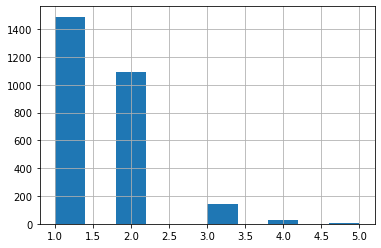

In [232]:
# Create a price category attribute with 5 categories and plot histogram
features_and_labels['price_cat'] = pd.cut(features_and_labels['price'], bins=[0., 25000., 50000., 75000., 100000., np.inf], labels=[1,2,3,4,5])
features_and_labels['price_cat'].hist()

In [233]:
# Stratified sampling based on price category for training and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.51, random_state=42)
for train_index, test_index in split.split(features_and_labels, features_and_labels['price_cat']):
    strat_train_set = features_and_labels.loc[train_index]
    strat_test_set = features_and_labels.loc[test_index]
strat_test_set['price_cat'].value_counts()/len(strat_test_set)

1    0.539773
2    0.397017
3    0.051847
4    0.009943
5    0.001420
Name: price_cat, dtype: float64

- These proportions seem to match the relative bar heights for each of the price category strata in the above histogram.

In [234]:
# Create train and test sets for both features (x) and labels (y)
x_train = strat_train_set
y_train = strat_train_set['price']
x_test = strat_test_set
y_test = strat_test_set['price']

In [235]:
# Applying all transformations to train data (numerical and categorical) using the full pipeline
num_attribs = list(cars_numerical)
cat_attribs = list(cars_categoric)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_prep = full_pipeline.fit_transform(x_train) 
train_prep

array([[-7.06124313e-01, -6.97213186e-01, -9.78220737e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-6.04198966e-02, -3.20205893e-04,  4.09886881e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.68031053e-01,  1.89741516e-01, -2.31161785e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-7.67039824e-01, -7.60567094e-01, -8.02328849e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.30490518e-01, -7.81685063e-01, -3.63048597e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.08659496e-01,  8.41516705e-02,  2.21692026e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [236]:
# Applying all transformations to test data (numerical and categorical) using ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

test_prep = full_pipeline.fit_transform(x_test)
test_prep

array([[ 0.76404408,  0.93247046, -0.23117103, ...,  0.        ,
         1.        ,  0.        ],
       [-0.72193022, -0.78573455, -0.34643618, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17366641, -1.24525449, -0.96540434, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.90024713, -0.53599545, -0.23117103, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52628819,  0.0334097 ,  0.94733138, ...,  0.        ,
         0.        ,  0.        ],
       [-0.69815463, -0.7158076 , -0.41695207, ...,  0.        ,
         0.        ,  0.        ]])

Linear Regression

In [237]:
# Fit linear regression model on training set
np.random.seed(42)
lin_reg = LinearRegression()
lin_reg.fit(train_prep, y_train)

LinearRegression()

In [238]:
# Observe model predictions on instances from the training set
data_prepared = full_pipeline.fit_transform(x_train)
pred = list(lin_reg.predict(data_prepared))
obs = list(y_train)

pred_series = pd.Series(pred, name='predict')
obs_series = pd.Series(obs, name='observed')
pred_series, obs_series
pd.concat([pred_series, obs_series], axis=1)

,predict,observed
0,30909.085938,35125.0
1,22751.054688,20595.0
2,36808.835938,41725.0
3,36812.835938,41325.0
4,16635.335938,13991.0
...,...,...
1347,5006.835938,5750.0
1348,23985.835938,29868.0
1349,16884.835938,21997.0
1350,19816.085938,20122.0


In [239]:
# Evaluate model performance on training set by measuring error (Root Mean Square Error)
np.random.seed(42)
lin_predictions = lin_reg.predict(train_prep)
lin_mse = mean_squared_error(y_train, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4948.997906942837

In [240]:
# Perform k-fold validation of linear regression model on training set and compute cross-validation scores
np.random.seed(42)
lin_scores = cross_val_score(lin_reg, train_prep, y_train, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean RMSE:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [1.76878775e+12 8.03969062e+12 3.05685527e+14 6.90041429e+13
 1.98003566e+14 2.24903864e+13 1.19553584e+14 4.16667577e+14
 2.87266349e+14 7.46148074e+13]
Mean RMSE: 150309441823603.34
Standard deviation: 137131024539308.62


Decision Tree Regression

In [241]:
# Train decision tree regression model to find non-linear relationship in data
np.random.seed(42)
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prep, y_train)

DecisionTreeRegressor()

In [242]:
# Evaluate model performance on training set
np.random.seed(42)
tree_predictions = tree_reg.predict(train_prep)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

849.1941321649174

In [243]:
# Perform k-fold validation of decision tree model on training set and compute cross-validation scores
np.random.seed(42)
scores = cross_val_score(tree_reg, train_prep, y_train, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
    
display_scores(tree_rmse_scores)

Scores: [6002.75474825 7677.85533166 7625.84814817 7616.25929323 6172.83325154
 8400.00026312 7260.55188145 7448.84608206 6787.01078935 6169.90175406]
Mean RMSE: 7116.186154289319
Standard deviation: 757.5248046076052


- This much lower mean RMSE shows that Decision Tree model performs much better than Linear Regression model.

Ridge Regression

In [244]:
# Train ridge regression model
np.random.seed(42)
ridge_reg = Ridge()
ridge_reg.fit(train_prep, y_train)

Ridge()

In [245]:
# Evaluate model performance on training set
np.random.seed(42)
ridge_predictions = ridge_reg.predict(train_prep)
ridge_mse = mean_squared_error(y_train, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

5056.080260524775

In [246]:
# 
alpha_grid = {'alpha': np.logspace(-5,2,8)}
grid_search_ridge = GridSearchCV(ridge_reg,
                                alpha_grid,
                                 cv=3, 
                                 scoring='neg_mean_squared_error',
                                return_train_score=True)
grid_search_ridge.fit(train_prep, y_train)
ridge_best_alpha = grid_search_ridge.best_params_
ridge_best_alpha

{'alpha': 1.0}

In [247]:
# Perform k-fold validation of model on training set and compute cross-validation scores
ridge_reg = grid_search_ridge.best_estimator_
scores = cross_val_score(ridge_reg, train_prep, y_train, scoring = "neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores) 
display_scores(ridge_rmse_scores)

Scores: [5318.68003895 6057.30271383 7474.21992728 6110.80760822 4964.36867722
 7864.88125465 6046.53446207 6042.25341215 5446.52818102 5118.5306435 ]
Mean RMSE: 6044.410691889092
Standard deviation: 909.4473340084554


Random Forest Regression

In [248]:
# Train random forest model
np.random.seed(42)
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prep, y_train)

RandomForestRegressor()

In [249]:
# Evaluate model performance on training set
np.random.seed(42)
rf_predictions = forest_reg.predict(train_prep)
forest_mse = mean_squared_error(y_train, rf_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2163.099204764315

In [250]:
# Perform k-fold validation of model on training set and compute cross-validation scores
np.random.seed(42)
scores = cross_val_score(forest_reg, train_prep, y_train, scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [4584.75590892 5850.48881215 6408.67207888 5142.77516866 5436.75901926
 7273.54644872 5370.59927164 4613.19019162 5199.5649242  3961.60055296]
Mean RMSE: 5384.19523769976
Standard deviation: 904.9462943515148


In [251]:
# Search for best combination of hyperparameter values for random forest using cross-validation
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor(random_state=42)

In [252]:
# Find best estimator model
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(train_prep, y_train)
grid_search.best_params_
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [253]:
# Evaluation scores for the different hyperparameter combinations
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8406.939807954372 {'max_features': 2, 'n_estimators': 3}
7058.497203180897 {'max_features': 2, 'n_estimators': 10}
6667.076109347297 {'max_features': 2, 'n_estimators': 30}
7973.444377902578 {'max_features': 4, 'n_estimators': 3}
6890.876471234469 {'max_features': 4, 'n_estimators': 10}
6336.0592379249865 {'max_features': 4, 'n_estimators': 30}
7491.111835613085 {'max_features': 6, 'n_estimators': 3}
6277.008848747513 {'max_features': 6, 'n_estimators': 10}
5935.644602171981 {'max_features': 6, 'n_estimators': 30}
7597.242578011743 {'max_features': 8, 'n_estimators': 3}
6339.263370696712 {'max_features': 8, 'n_estimators': 10}
6027.382648468074 {'max_features': 8, 'n_estimators': 30}
7699.819512293586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6688.597052664471 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7406.058448422297 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6482.888529088094 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [254]:
# Importance of each attribute in making accurate predictions under best model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.82755913e-02, 9.73721373e-02, 8.55973684e-02, 1.46700032e-03,
       4.00779831e-03, 1.59994709e-03, 1.09325511e-03, 2.86859777e-03,
       1.50876332e-02, 6.82282052e-03, 7.50313453e-04, 7.59355651e-04,
       2.56093485e-06, 2.84438232e-03, 8.41130249e-04, 3.37181579e-03,
       1.56541130e-03, 9.91153880e-04, 1.09360813e-03, 1.22298564e-03,
       6.67389097e-03, 2.70436066e-03, 7.54229295e-05, 1.76717180e-03,
       1.11790282e-04, 1.08276326e-04, 8.36570526e-06, 5.59765286e-05,
       4.10950188e-05, 6.14278364e-05, 7.34460756e-03, 7.26640493e-04,
       8.17522988e-04, 7.92447066e-04, 1.77236366e-03, 2.68758132e-03,
       2.46042259e-03, 6.03112655e-03, 2.77655643e-02, 1.02932597e-03,
       2.84353337e-03, 6.87639293e-02, 1.00765100e-03, 6.21060929e-03,
       2.14288976e-03, 1.35029966e-03, 1.43432932e-02, 1.03354636e-05,
       8.20553676e-05, 5.83529008e-05, 5.96500641e-04, 4.98322149e-03,
       1.04951902e-03, 8.96354274e-03, 5.22172665e-04, 7.54823402e-05,
      

In [255]:
# Compare performances of the four models
table_cv_scores_summary = pd.DataFrame(display_scores(lin_rmse_scores),
                                     display_scores(tree_rmse_scores), display_scores(ridge_rmse_scores),
                                  display_scores(forest_rmse_scores))
table_cv_scores_summary

Scores: [1.76878775e+12 8.03969062e+12 3.05685527e+14 6.90041429e+13
 1.98003566e+14 2.24903864e+13 1.19553584e+14 4.16667577e+14
 2.87266349e+14 7.46148074e+13]
Mean RMSE: 150309441823603.34
Standard deviation: 137131024539308.62
Scores: [6002.75474825 7677.85533166 7625.84814817 7616.25929323 6172.83325154
 8400.00026312 7260.55188145 7448.84608206 6787.01078935 6169.90175406]
Mean RMSE: 7116.186154289319
Standard deviation: 757.5248046076052
Scores: [5318.68003895 6057.30271383 7474.21992728 6110.80760822 4964.36867722
 7864.88125465 6046.53446207 6042.25341215 5446.52818102 5118.5306435 ]
Mean RMSE: 6044.410691889092
Standard deviation: 909.4473340084554
Scores: [4584.75590892 5850.48881215 6408.67207888 5142.77516866 5436.75901926
 7273.54644872 5370.59927164 4613.19019162 5199.5649242  3961.60055296]
Mean RMSE: 5384.19523769976
Standard deviation: 904.9462943515148


""


### Evaluate System on Test Set

In [256]:
# Make predictions on test set using the chosen best model and evaluate prediction error
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_prep)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

11657.099258610695

In [257]:
# Compute 95% conf. int. for generalisation error of best model
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([10909.52443036, 12359.53894583])

In [266]:
# Final model fit assessment
y_hat_test = final_model.predict(test_prep)
test_mse = mean_squared_error(y_test, y_hat_test) 
test_rmse = np.sqrt(test_mse)
test_r_squared = final_model.score(test_prep, y_test)

results = pd.DataFrame({'RMSE': [test_rmse],'R^2 value': [test_r_squared]})
results

,RMSE,R^2 value
0,11657.099259,0.419836


### Conclusion

- We fit a number of supervised machine learning regression models to the prepared training set, i.e. linear regression, decision tree regression, random forest regression, and ridge regression. Evaluations of these models' performances resulted in choosing the random forest regression model as our final model. When applied to the test set, our model did not perform particularly well, with RMSE of 11,657 and R^2 value of 0.42. This fairly poor performance is certainly in large part due to the small size of the overall data set, but also to the insufficiently large training set proportion of the overall sample. To achieve improved performance, a bigger sample size is encouraged, such that the training set could be increased both in absolute size and as a proportion of the overall sample.